<a href="https://colab.research.google.com/github/sallanmarvin/Hands_On/blob/main/Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [2]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [3]:
## Write your code here
df.isnull().sum()

,0
ResponseId,0
MainBranch,0
Age,0
Employment,0
RemoteWork,10631
...,...
JobSatPoints_11,35992
SurveyLength,9255
SurveyEase,9199
ConvertedCompYearly,42002


In [4]:
# prompt: Identify and manage missing values in critical columns such as Employment, JobSat, and RemoteWork. Implement a strategy to fill or drop these values, depending on the significance of the missing data.

# Check the percentage of missing values in 'Employment', 'JobSat', and 'RemoteWork'
employment_missing_percentage = df['Employment'].isnull().sum() / len(df) * 100
jobsatisfaction_missing_percentage = df['JobSat'].isnull().sum() / len(df) * 100
remotework_missing_percentage = df['RemoteWork'].isnull().sum() / len(df) * 100

print(f"'Employment' missing percentage: {employment_missing_percentage:.2f}%")
print(f"'JobSat' missing percentage: {jobsatisfaction_missing_percentage:.2f}%")
print(f"'RemoteWork' missing percentage: {remotework_missing_percentage:.2f}%")


# Example strategy: Fill missing 'Employment' with 'Other' (you can choose a different strategy based on domain knowledge)
# For 'JobSat' and 'RemoteWork', if the percentage of missing values is low, you can drop the rows with missing values

df['Employment'].fillna('Other', inplace=True)


# Drop rows with missing values for 'JobSat' and 'RemoteWork'
# Adjust the threshold based on your needs. Here we drop rows only if both 'JobSat' and 'RemoteWork' are NaN.
df.dropna(subset=['JobSat', 'RemoteWork'], how='all', inplace=True)


# Verify the missing values after handling them
print("\nMissing values after handling:")
print(df.isnull().sum())


'Employment' missing percentage: 0.00%
'JobSat' missing percentage: 55.49%
'RemoteWork' missing percentage: 16.25%

Missing values after handling:


<ipython-input-4-4fcfab1ea220>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Employment'].fillna('Other', inplace=True)


ResponseId                 0
MainBranch                 0
Age                        0
Employment                 0
RemoteWork                 9
                       ...  
JobSatPoints_11        25371
SurveyLength            7606
SurveyEase              7575
ConvertedCompYearly    31383
JobSat                 25689
Length: 114, dtype: int64


#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


In [ ]:
## Write your code here


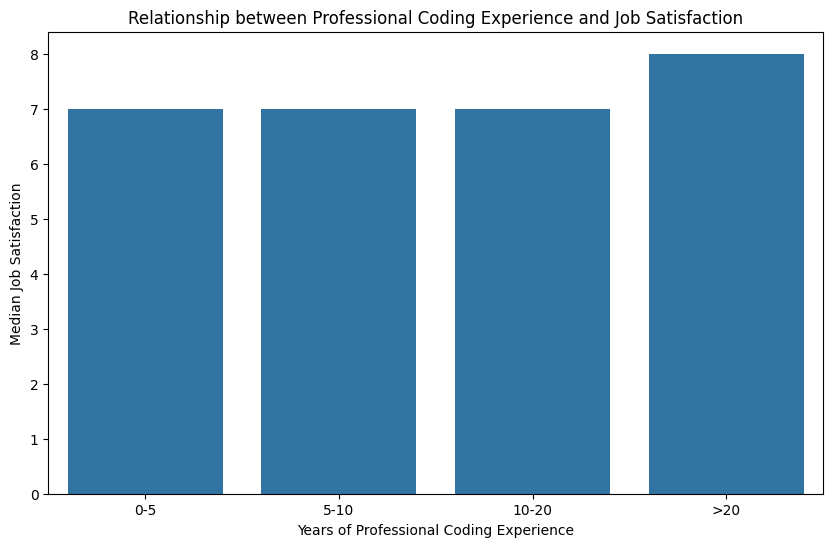

In [6]:
# prompt: Analyze the relationship between years of professional coding experience (YearsCodePro) and job satisfaction (JobSat). Summarize YearsCodePro and calculate median satisfaction scores based on experience ranges.
# Create experience ranges for YearsCodePro (e.g., 0-5, 5-10, 10-20, >20 years).
# Calculate the median JobSat for each range.
# Visualize the relationship using a bar plot or similar visualization

import matplotlib.pyplot as plt
# Create experience ranges
def categorize_experience(years):
    if years < 5:
        return '0-5'
    elif years < 10:
        return '5-10'
    elif years < 20:
        return '10-20'
    else:
        return '>20'

df['ExperienceCategory'] = df['YearsCodePro'].astype(str).apply(lambda x: categorize_experience(int(x)) if x.isdigit() else 'Unknown')

# Group by experience category and calculate the median JobSat
experience_satisfaction = df.groupby('ExperienceCategory')['JobSat'].median().reset_index()

# Drop rows with 'Unknown' experience
experience_satisfaction = experience_satisfaction[experience_satisfaction['ExperienceCategory'] != 'Unknown']

# Visualize the relationship
plt.figure(figsize=(10, 6))
sns.barplot(x='ExperienceCategory', y='JobSat', data=experience_satisfaction, order=['0-5', '5-10', '10-20', '>20'])
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Median Job Satisfaction')
plt.title('Relationship between Professional Coding Experience and Job Satisfaction')
plt.show()


#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


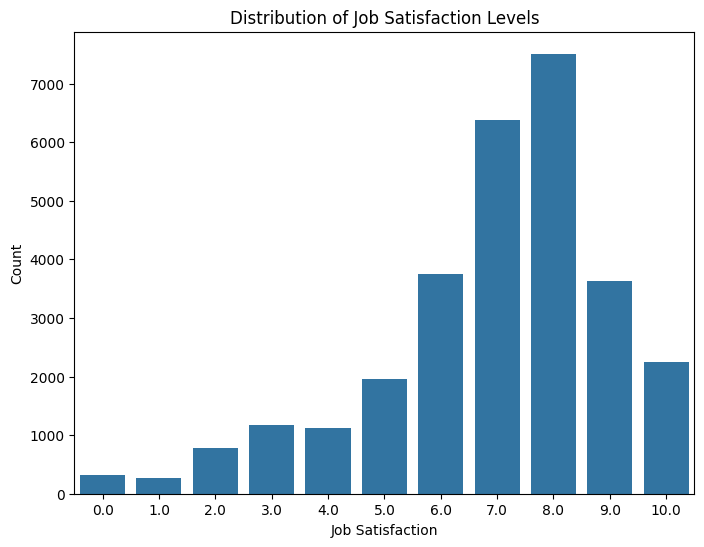

In [7]:
plt.figure(figsize=(8, 6))
sns.countplot(x='JobSat', data=df)
plt.xlabel('Job Satisfaction')
plt.ylabel('Count')
plt.title('Distribution of Job Satisfaction Levels')
plt.show()

#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


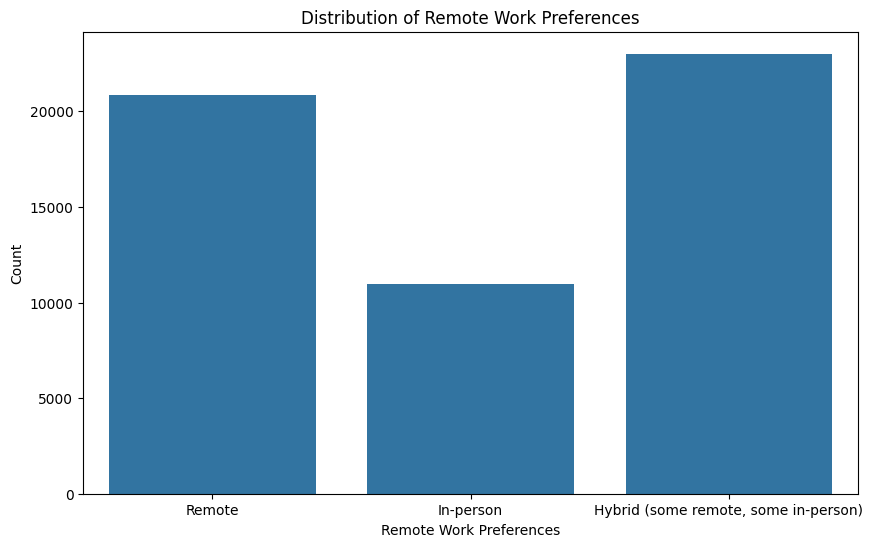

Employment                           Employed, full-time             \
DevType                              Academic researcher Blockchain   
RemoteWork                                                            
Hybrid (some remote, some in-person)                 324         16   
In-person                                            209         14   
Remote                                                43         66   

Employment                                                          \
DevType                              Cloud infrastructure engineer   
RemoteWork                                                           
Hybrid (some remote, some in-person)                           220   
In-person                                                       42   
Remote                                                         216   

Employment                                                                   \
DevType                              Data engineer Data or business analyst   
RemoteWork                                                                    
Hybrid (some remote, some in-person)           430                      177   
In-person                                      110                       96   
Remote                                         297                       77   

Employment                                                                          \
DevType                              Data scientist or machine learning specialist   
RemoteWork                                                                           
Hybrid (some remote, some in-person)                                           386   
In-person                                                                      126   
Remote                                                                         193   

Employment                                                            \
DevType                              Database administrator Designer   
RemoteWork                                                             
Hybrid (some remote, some in-person)                     42       29   
In-person                                                39       16   
Remote                                                   33       29   

Employment                                                                 \
DevType                              DevOps specialist Developer Advocate   
RemoteWork                                                                  
Hybrid (some remote, some in-person)               382                 24   
In-person                                           78                  7   
Remote                                             250                 45   

Employment                                                               \
DevType                              Developer Experience Developer, AI   
RemoteWork                                                                
Hybrid (some remote, some in-person)                   67           139   
In-person                                              25            90   
Remote                                                 70           100   

Employment                                                  \
DevType                              Developer, QA or test   
RemoteWork                                                   
Hybrid (some remote, some in-person)                   170   
In-person                                               48   
Remote                                                 176   

Employment                                                \
DevType                              Developer, back-end   
RemoteWork                                                 
Hybrid (some remote, some in-person)                3069   
In-person                                           1115   
Remote                                              3002   

Employment                                                                     

In [11]:
# Count plot for remote work distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='RemoteWork', data=df)
plt.xlabel('Remote Work Preferences')
plt.ylabel('Count')
plt.title('Distribution of Remote Work Preferences')
plt.show()

# Cross-tabulation of remote work preferences by employment type and job role
remote_work_cross_tab = pd.crosstab(df['RemoteWork'], [df['Employment'], df['DevType']])
remote_work_cross_tab


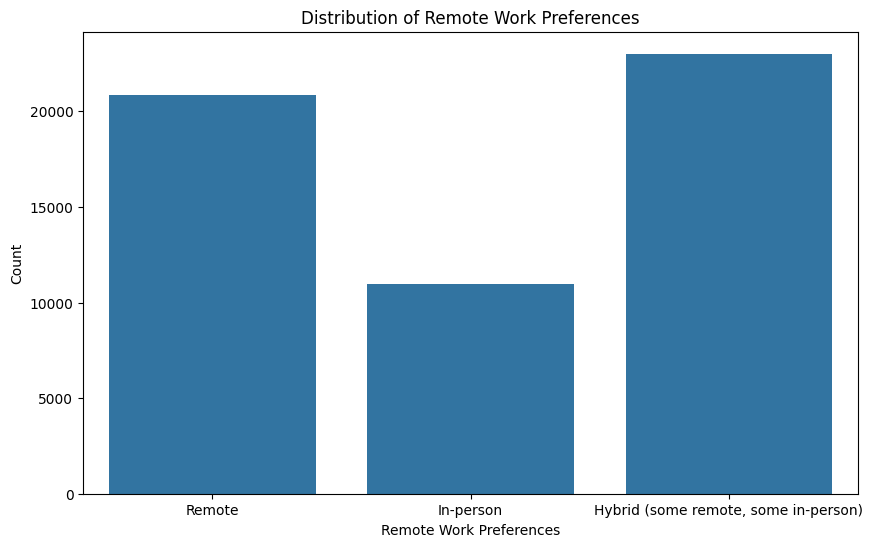

Employment                           Employed, full-time             \
DevType                              Academic researcher Blockchain   
RemoteWork                                                            
Hybrid (some remote, some in-person)                 324         16   
In-person                                            209         14   
Remote                                                43         66   

Employment                                                          \
DevType                              Cloud infrastructure engineer   
RemoteWork                                                           
Hybrid (some remote, some in-person)                           220   
In-person                                                       42   
Remote                                                         216   

Employment                                                                   \
DevType                              Data engineer Data or business analyst   
RemoteWork                                                                    
Hybrid (some remote, some in-person)           430                      177   
In-person                                      110                       96   
Remote                                         297                       77   

Employment                                                                          \
DevType                              Data scientist or machine learning specialist   
RemoteWork                                                                           
Hybrid (some remote, some in-person)                                           386   
In-person                                                                      126   
Remote                                                                         193   

Employment                                                            \
DevType                              Database administrator Designer   
RemoteWork                                                             
Hybrid (some remote, some in-person)                     42       29   
In-person                                                39       16   
Remote                                                   33       29   

Employment                                                                 \
DevType                              DevOps specialist Developer Advocate   
RemoteWork                                                                  
Hybrid (some remote, some in-person)               382                 24   
In-person                                           78                  7   
Remote                                             250                 45   

Employment                                                               \
DevType                              Developer Experience Developer, AI   
RemoteWork                                                                
Hybrid (some remote, some in-person)                   67           139   
In-person                                              25            90   
Remote                                                 70           100   

Employment                                                  \
DevType                              Developer, QA or test   
RemoteWork                                                   
Hybrid (some remote, some in-person)                   170   
In-person                                               48   
Remote                                                 176   

Employment                                                \
DevType                              Developer, back-end   
RemoteWork                                                 
Hybrid (some remote, some in-person)                3069   
In-person                                           1115   
Remote                                              3002   

Employment                                                                     

#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


Top 10 Languages in United States:
Series([], Name: count, dtype: int64)


IndexError: index 0 is out of bounds for axis 0 with size 0

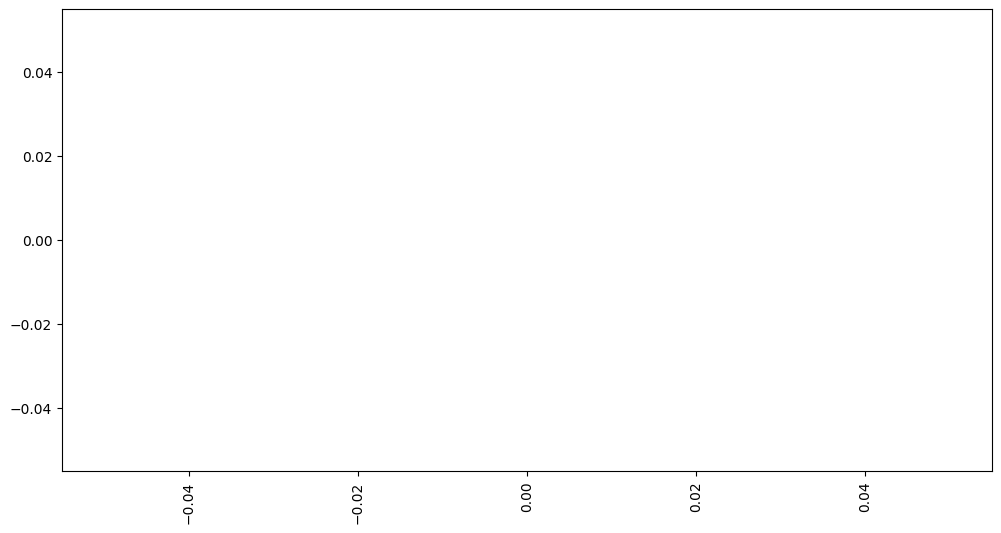

In [14]:
# Function to explode the 'LanguageHaveWorkedWith' column and count languages
def analyze_languages_by_region(df, region):
    region_df = df[df['Country'] == region]
    language_counts = region_df['LanguageHaveWorkedWith'].str.split(';').explode().value_counts()
    return language_counts


# Example usage for a specific region (e.g., United States)
region_to_analyze = 'United States'
language_counts_by_region = analyze_languages_by_region(df, region_to_analyze)


# Display the top 10 languages in the specified region
print(f"Top 10 Languages in {region_to_analyze}:")
print(language_counts_by_region.head(10))


# Visualize the results
plt.figure(figsize=(12, 6))
language_counts_by_region.head(10).plot(kind='bar')  # Bar plot for top 10
plt.title(f"Top 10 Programming Languages in {region_to_analyze}")
plt.xlabel("Programming Languages")
plt.ylabel("Number of Respondents")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


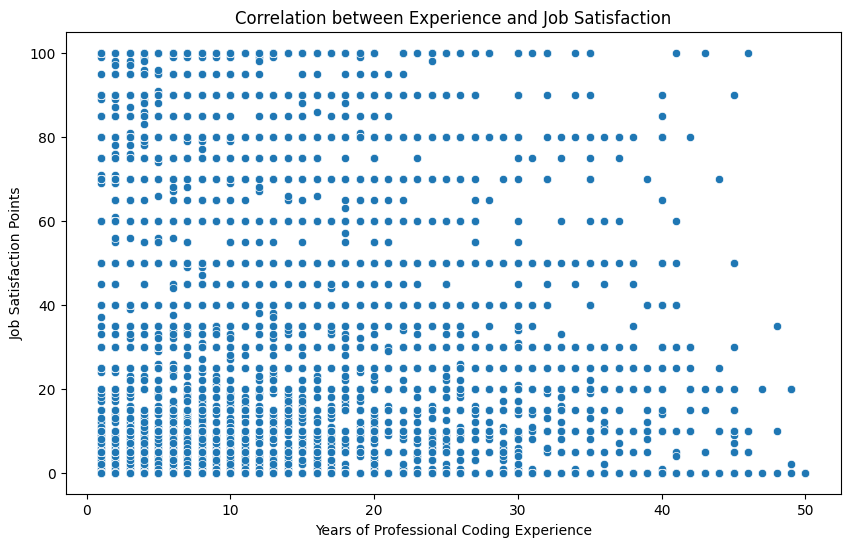

In [15]:
# Convert 'YearsCodePro' to numeric, coercing errors to NaN
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='YearsCodePro', y='JobSatPoints_1', data=df)
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Job Satisfaction Points')
plt.title('Correlation between Experience and Job Satisfaction')
plt.show()

#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


Employment                                          Employed, full-time  \
EdLevel                                                                   
Associate degree (A.A., A.S., etc.)                                1058   
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                      16805   
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                   11008   
Primary/elementary school                                           160   
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                     2072   
Secondary school (e.g. American high school, Ge...                 1460   
Some college/university study without earning a...                 3579   
Something else                                                      376   

Employment                                          Employed, full-time;Employed, part-time  \
EdLevel                                                                                       
Associate degree (A.A., A.S., etc.)                        

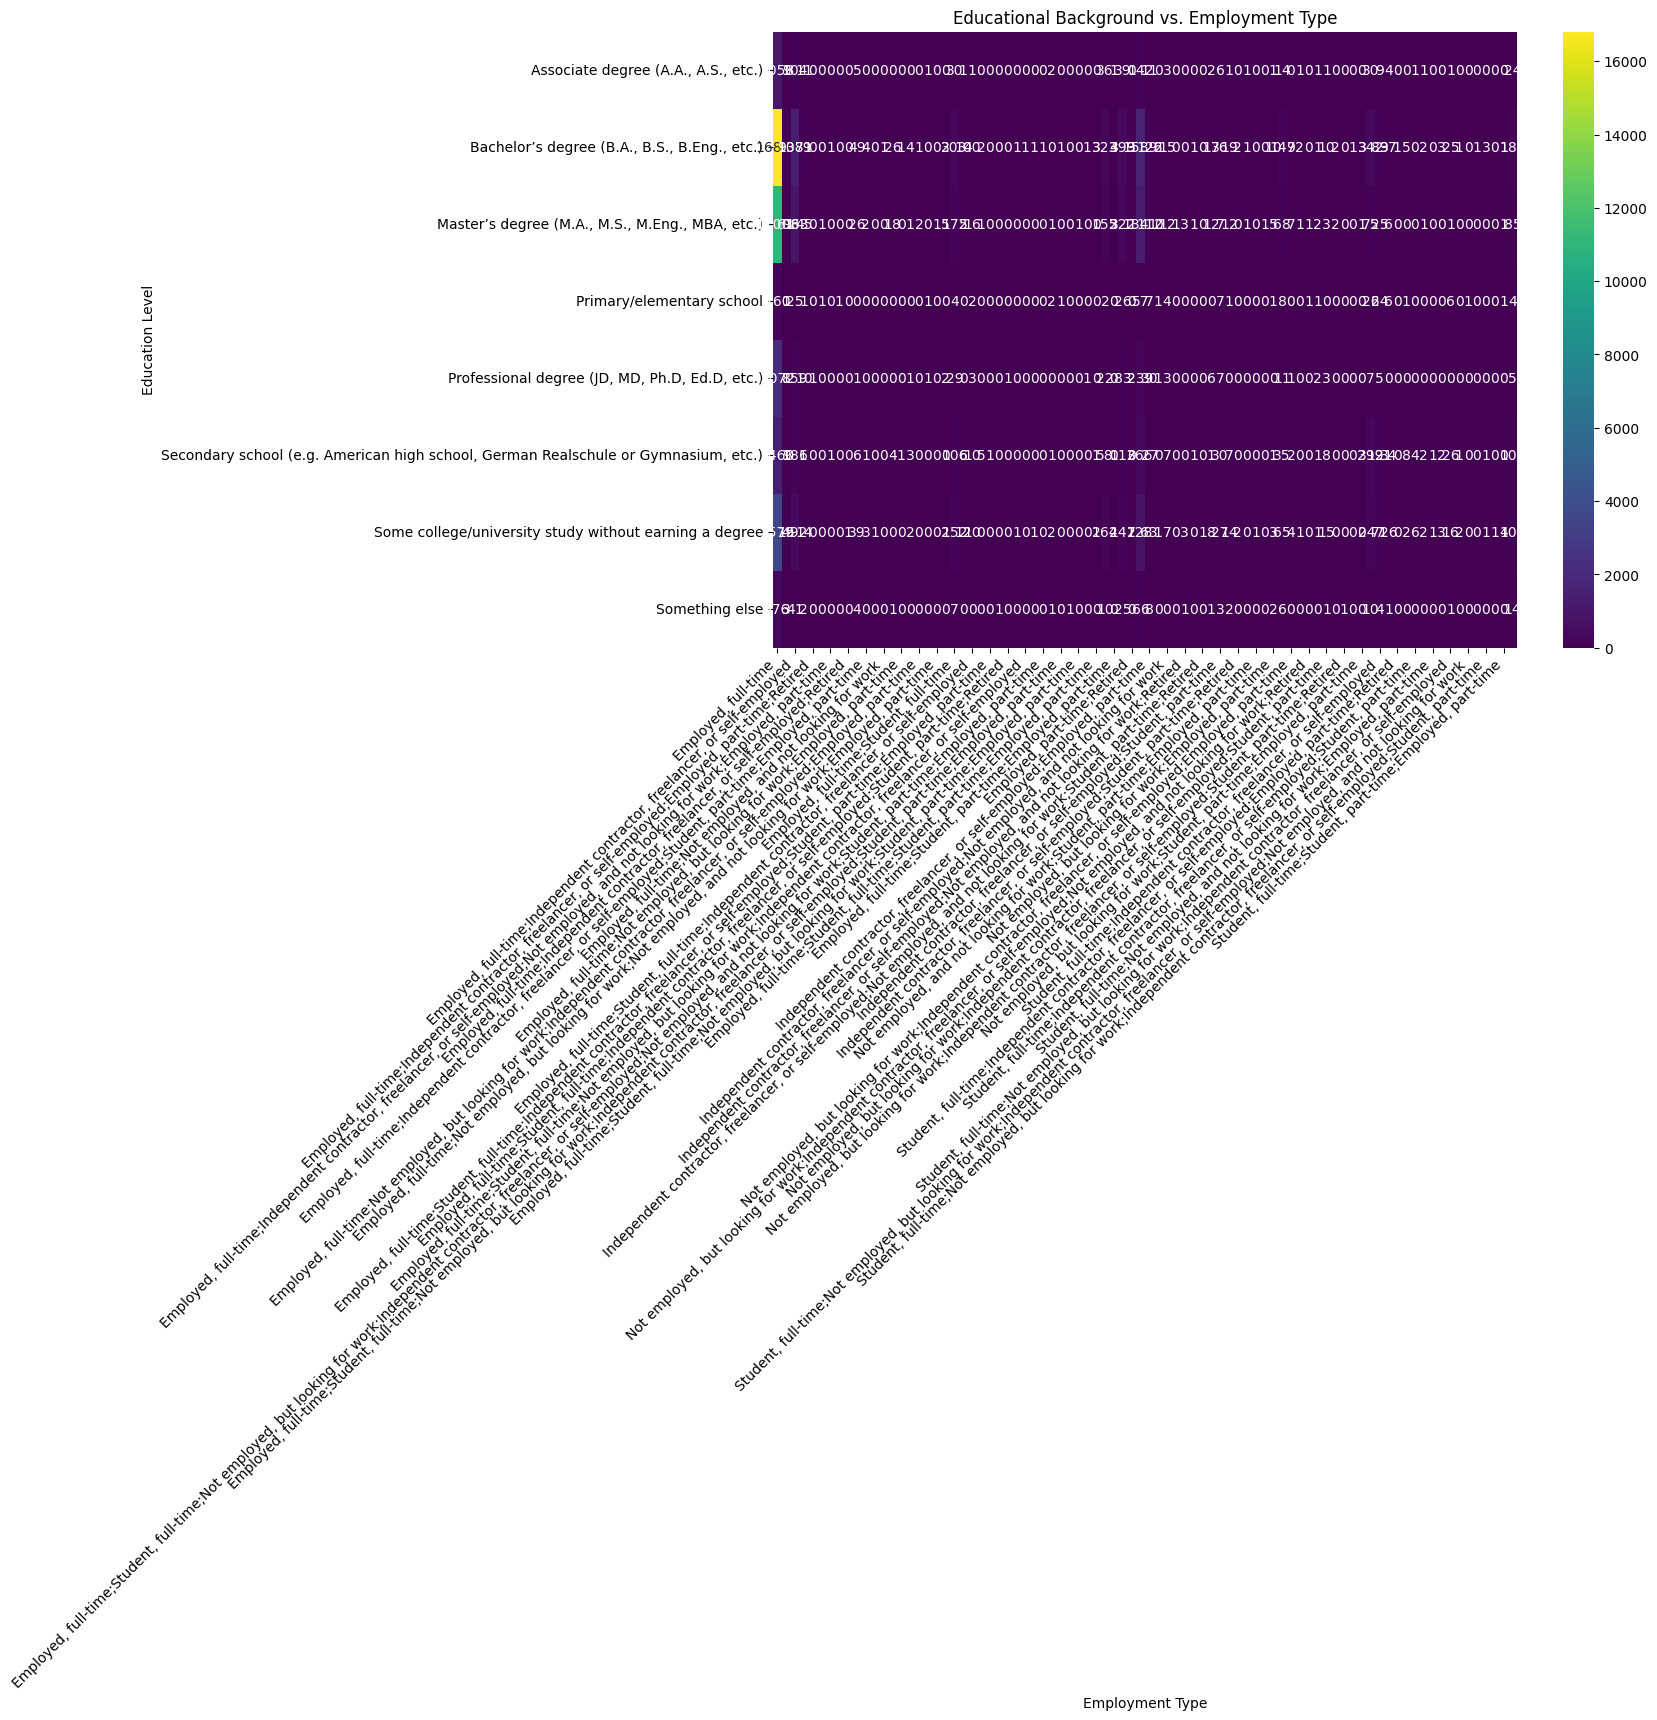

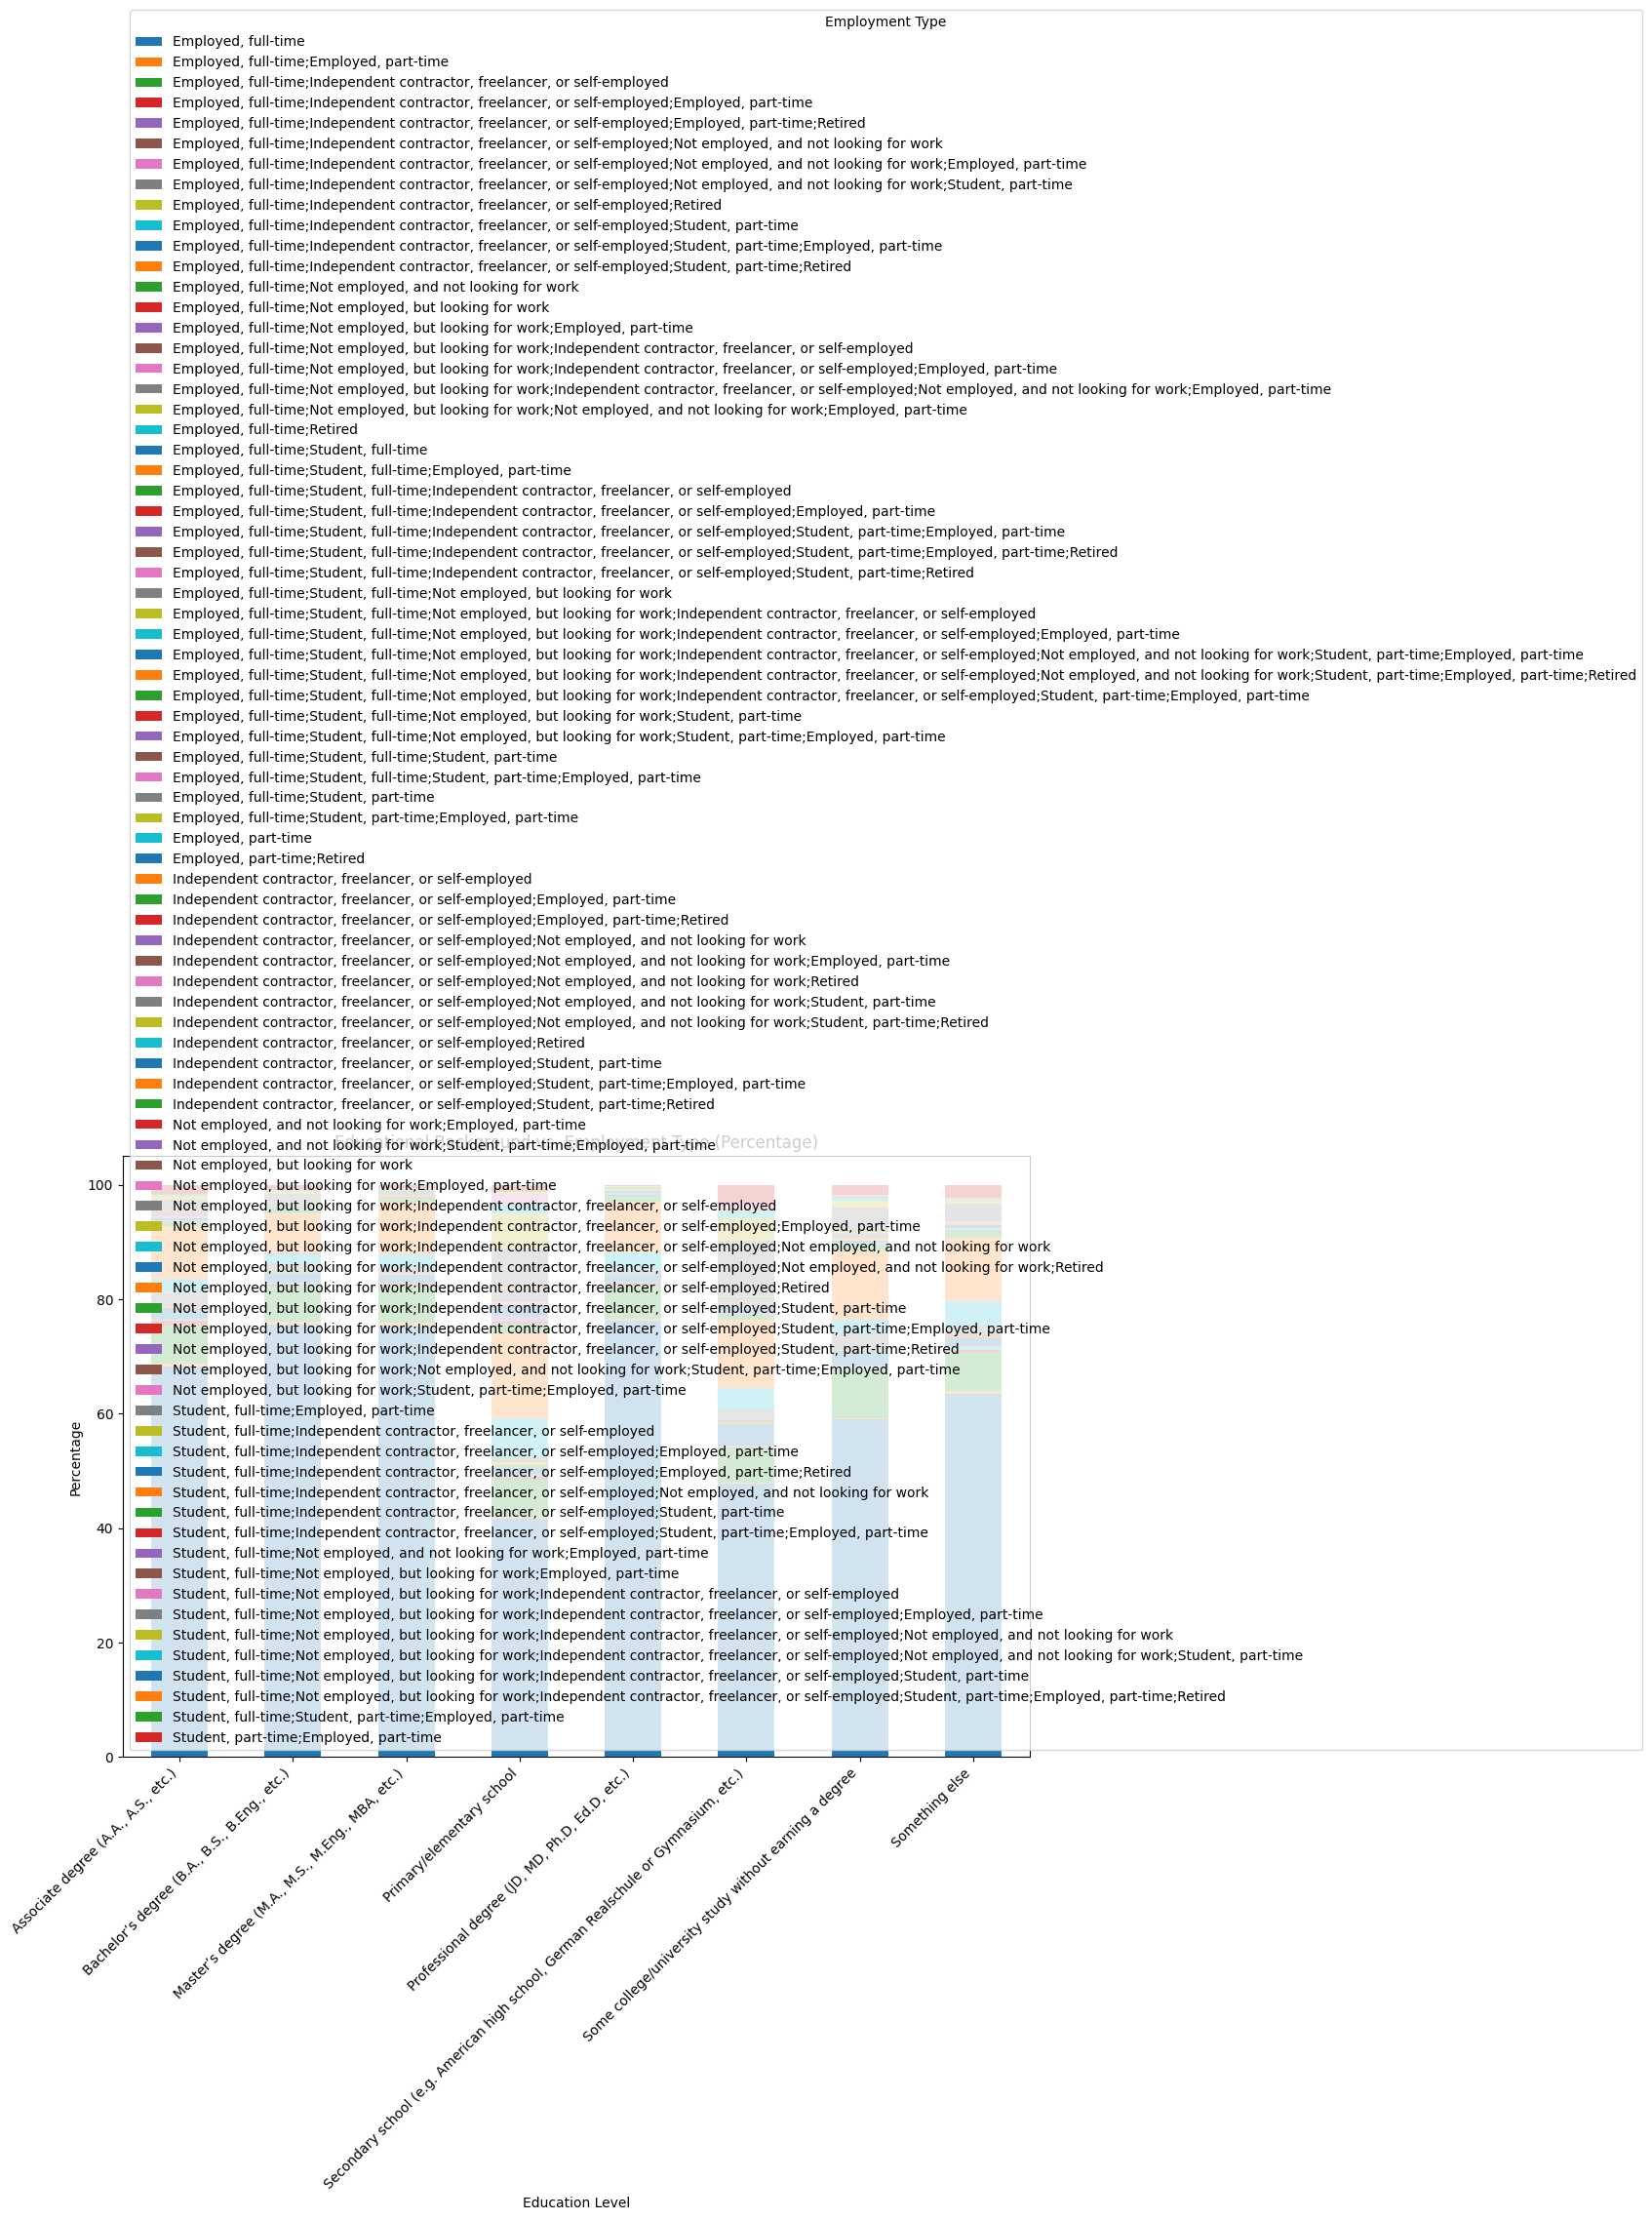

In [16]:
# Cross-tabulation of EdLevel and Employment
ed_employment_cross = pd.crosstab(df['EdLevel'], df['Employment'])
print(ed_employment_cross)

# Visualization: Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(ed_employment_cross, annot=True, fmt='d', cmap='viridis')
plt.title('Educational Background vs. Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Education Level')
plt.xticks(rotation=45, ha='right')
plt.show()

# Visualization: Percentage stacked bar chart
ed_employment_percentage = ed_employment_cross.div(ed_employment_cross.sum(axis=1), axis=0) * 100
ed_employment_percentage.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Educational Background vs. Employment Type (Percentage)')
plt.xlabel('Education Level')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Employment Type')
plt.show()

#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [17]:
## Write your code here
# Save the cleaned and analyzed dataset
df.to_csv('cleaned_survey_data.csv', index=False)



- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.
